In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ruta_limpia = '../data/MX_videos_limpio.csv'
df = pd.read_csv(ruta_limpia)

top_3_categories = df['category_name'].value_counts().nlargest(3).index
df_filtered = df[df['category_name'].isin(top_3_categories)].copy()

print("Dataset listo. Usaremos estas 3 categorías:", list(top_3_categories))
print("Número de muestras para el modelo:", len(df_filtered))

Dataset listo. Usaremos estas 3 categorías: ['Entertainment', 'People & Blogs', 'Sports']
Número de muestras para el modelo: 25696


In [2]:

features = ['views', 'likes', 'dislikes', 'comment_count']
target = 'category_name'

X = df_filtered[features]
y = df_filtered[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [3]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos escalados. Features ahora con media 0 y desviación estándar 1.")

Datos escalados. Features ahora con media 0 y desviación estándar 1.


In [4]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

print("Modelo KNN entrenado con k=5.")

Modelo KNN entrenado con k=5.


In [5]:
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}\n")

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy del modelo: 0.5443

Reporte de Clasificación:
                precision    recall  f1-score   support

 Entertainment       0.59      0.72      0.65      4046
People & Blogs       0.45      0.38      0.42      2448
        Sports       0.47      0.27      0.34      1215

      accuracy                           0.54      7709
     macro avg       0.51      0.46      0.47      7709
  weighted avg       0.53      0.54      0.53      7709



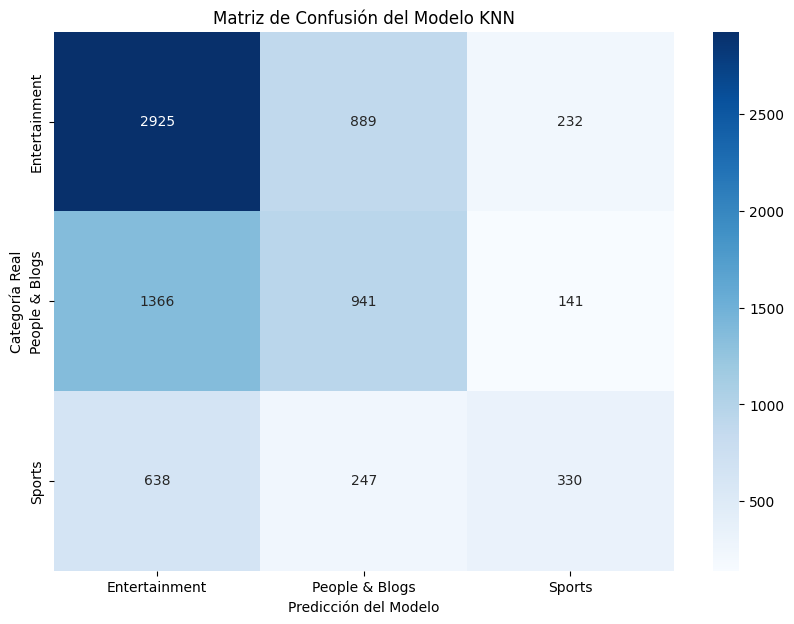

In [6]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Matriz de Confusión del Modelo KNN')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Categoría Real')
plt.show()